In [13]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")
sns.set_context("poster")

In [14]:
dfs = []
for csv_file in Path("report_results").glob("*.csv"):
    df = pd.read_csv(csv_file)
    dfs.append(df)

input_df = pd.concat(dfs)
input_df["length_bucket"] = pd.cut(
    input_df["example_length"],
    bins=[0, 10, 20, 30, np.inf],
    labels=["0-9", "10-19", "20-29", "30+"]
)
input_df["model"] = input_df["model"].replace({
    "PTDeepCBOW": "DeepCBOW (PT)",
    "LSTMClassifier": "LSTM",
    "TreeLSTMClassifier": "Tree LSTM",
    }
    )

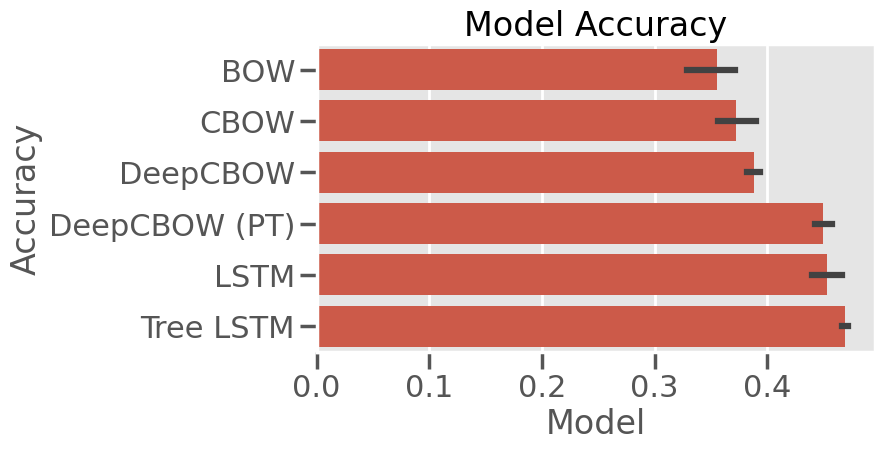

In [15]:
plotting_df = input_df.groupby(["model", "timestamp"])["correct"].mean().reset_index()

fig, ax = plt.subplots(figsize=(7.2, 4))

sns.barplot(plotting_df, y="model", x="correct", ax=ax)

ax.set_title("Model Accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Model")

fig.savefig("plots/model_accuracy.png", bbox_inches="tight")

/var/folders/yg/dclcb_pd4psb9vd397dx1jdr0000gn/T/ipykernel_1831/2395347592.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()


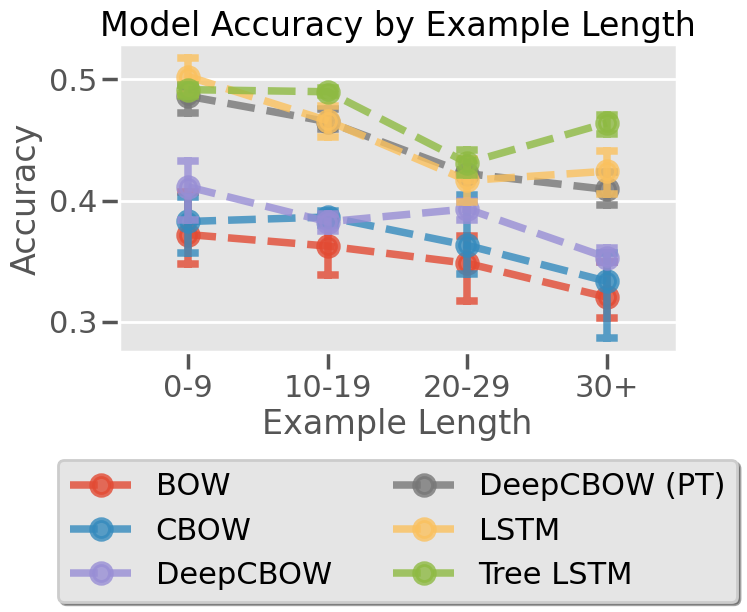

In [16]:
fig, ax = plt.subplots(figsize=(7.2, 4))

plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()
sns.pointplot(
    data=plotting_df,
    x="length_bucket",
    y="correct",
    markers='o',
    capsize=0.1,
    linestyles="--",
    hue="model",
    alpha=0.8
)

ax.set_title("Model Accuracy by Example Length")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Example Length")

# Place legend below the plot horizontally
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=2)

fig.savefig("plots/acc_vs_length.png", bbox_inches="tight")

In [119]:
pct_change_table = plotting_df.groupby(["model", "length_bucket"])["correct"].mean().reset_index()

# Create pct_change column
pct_change_table['pct_change'] = pct_change_table.groupby('model').apply(
    lambda x: (x['correct'] - x.loc[x['correct'].idxmax(), 'correct']) / 
              x.loc[x['correct'].idxmax(), 'correct'] * 100
).reset_index(level=0, drop=True)
pct_change_table.pivot_table(index="length_bucket", columns="model", values="pct_change").to_latex("tmp.tex")

/var/folders/yg/dclcb_pd4psb9vd397dx1jdr0000gn/T/ipykernel_80982/332513579.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_change_table = plotting_df.groupby(["model", "length_bucket"])["correct"].mean().reset_index()
/var/folders/yg/dclcb_pd4psb9vd397dx1jdr0000gn/T/ipykernel_80982/332513579.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pct_change_table['pct_change'] = pct_change_table.groupby('model').apply(
/var/folders/yg/dclcb_pd4psb9vd397dx1jdr0000gn/T/ipykernel_80982/332513579.py:8: Futur